## What is regression problem?

The regression problem is how to model one or several dependent variables/responses, Y, by means of a set of predictor variables, X.

In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features')

> How much  
> How many

* Predicting a number of some sort

Formula

Y_i=f(X_i, \beta)+e_i

## What we're going to cover
* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
  * Creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading methods

## Regression inputs and outputs

* Input and output shape

## Architecture of a regression model

| Hyperparameter | Typical value |
| --- | --- |
| Input layer shape | Same shapes as number of features (e.g for # bedrooms, # bathrooms, #car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum=1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Ouput layer shape | Same shape as desired prediction shape (e.g 1 for house price) |
| Hidden activation | Usually ReLU (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | MSE (mean square error) or MAE (mean absolute error)/Huber(combination of MAE/MSE) if outliers |
| Optimizer | SGD (stochastic gradient descent), Adam |

```
# 1. create a model (specified to your problem
model = tf.keras.Sequential([
  tf.keras.Input(shape=(3,)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras,layers.Dense(1, activation=None)
])
```

```
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=["mae"])
```

```
# 3. Fit the model
model.fit(X_train, y_train, epochs=100)
```




In [ ]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.11.0


## Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

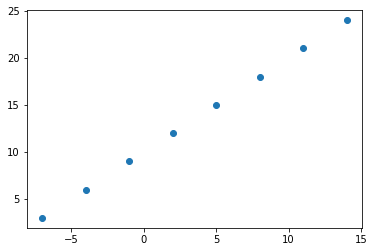

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15., 18.0, 21.0, 24.0])

# visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# X is the independent variable, Input features
# y is the dependent variable, labels


## Input and output shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
X.ndim

1

In [ ]:
# Turn our NumPY array into tensors

X = tf.constant(tf.cast(X, dtype=tf.float32))
y = tf.constant(tf.cast(y, dtype=tf.float32))

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

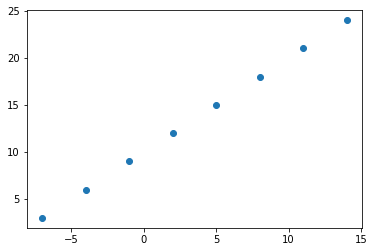

In [ ]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers as well as hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y  (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
) #mae mean absolute error #sgd ---> stochastic gradient descent

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 451ms/step - loss: 19.3486 - mae: 19.3486
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 19.0673 - mae: 19.0673
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 18.7861 - mae: 18.7861
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 18.5048 - mae: 18.5048
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 18.2236 - mae: 18.2236


In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 81ms/step


array([[-16.866743]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model

1. **Create a model** - here we might add **more layers**, increase the number of hidden units (all called **neurons**) within each of the hidden layers, change the **activation** function of each layer
2. **Compiling a model** here we might change the optimization function or perhaps the **learning rate** of the optimization function
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 910ms/step - loss: 19.5149 - mae: 19.5149
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 19.2336 - mae: 19.2336
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 18.9524 - mae: 18.9524
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 18.6711 - mae: 18.6711
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 18.3899 - mae: 18.3899
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 18.1086 - mae: 18.1086
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 17.8274 - mae: 17.8274
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 17.5461 - mae: 17.5461
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 17.2649 - mae: 17.2649
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 16.9836 - mae: 16.9836
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 100ms/step


array([[29.269648]], dtype=float32)

In [ ]:
# Rebuild the model again
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 485ms/step - loss: 13.2275 - mae: 13.2275
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2498 - mae: 12.2498
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 11.2677 - mae: 11.2677
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2749 - mae: 10.2749
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2656 - mae: 9.2656
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2339 - mae: 8.2339
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.1733 - mae: 7.1733
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7355 - mae: 6.7355
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1587 - mae: 7.1587
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4768 - mae: 7.4768
Epoch 11/100
1/1 [==============================] - 0s 10ms/st

In [ ]:
# Predict the model
model.predict([17.0])

1/1 [==============================] - 0s 37ms/step


array([[27.867208]], dtype=float32)

In [ ]:
model.predict([28.0])

1/1 [==============================] - 0s 66ms/step


array([[39.472057]], dtype=float32)

## Common ways to improve a deep model
* Adding layers
* Increase the number if hidden units
* Change the activation functions
* Changing tje optimization function
* Changing the learning rate
* Fitting on more data
* Fitting for longer


## Evaluating a model

In practice, a typical workflow you'll go through when building a neural network is

```
Build a model --> fit it --> evaluate it --> tweek a model --> fit it --> evaluate it --> fit it --> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how sp the predictions of a model line up against the ground truth(original labels)?

In [ ]:
# Make a bigger data
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10 # pattern we want the model to learn
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

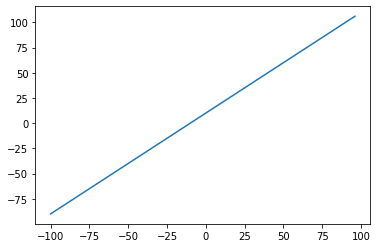

In [ ]:
# Visualize the data
plt.plot(X, y);

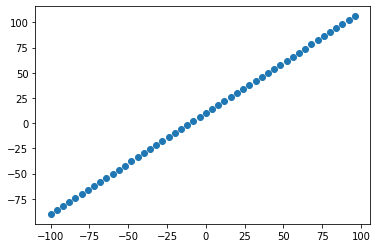

In [ ]:
plt.scatter(X, y);

### The 3 sets...

* **The Training set** - the model learns form this data, which is typically 70-80% of the data you have available
* **Validation set** - the model gets tunes on this data, which is typically 10-15% of the data available
*  **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available


### Generalization
The ability for a machine learning model to perform well on data it hasn't seen before

In [ ]:
# Check the length of sample
len(X)

50

In [ ]:
# Split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]


X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test =y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)


(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets ... let's visualize it again

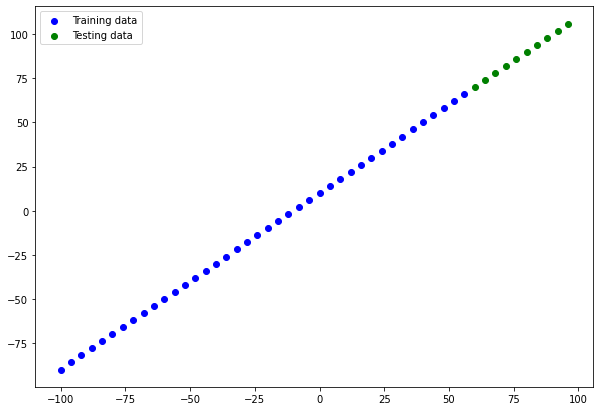

In [ ]:
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this

# plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what is y?)
# show legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

## Visualizing the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
# Let's create a mode which builds automatically by defining the input_shape args in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typicak when you bring in already learn patterns or parameters from other models during **transfer learning**

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video
🛠 **Exercise:** Try playing around with the number if hidden units inthe dense layer, see how that affects the number of parameters (total and trainable) by calling `model.summary()`

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get the model summary of our model
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


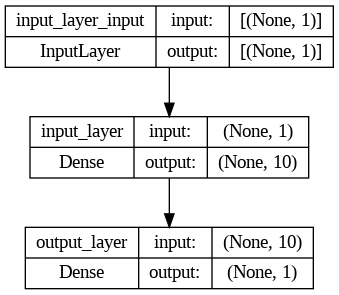

In [ ]:

tf.keras.utils.plot_model(model=model, show_shapes=True)

### Visualizing our model's prediction

To visualize predictions, it's good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[ 68.462814],
       [ 72.36716 ],
       [ 76.27151 ],
       [ 80.17586 ],
       [ 84.08021 ],
       [ 87.98456 ],
       [ 91.8889  ],
       [ 95.79324 ],
       [ 99.69759 ],
       [103.60193 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note** If you feel like you are going to reuse some kind of functionality in future, it's good ideas to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_prediction(
    train_data=X_train, 
    train_labels=y_train, 
    test_data=X_test, 
    test_labels=y_test, 
    predictions=y_pred
):
  """
  Plots training data, test data and compares predictions to ground 
  truth labels
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

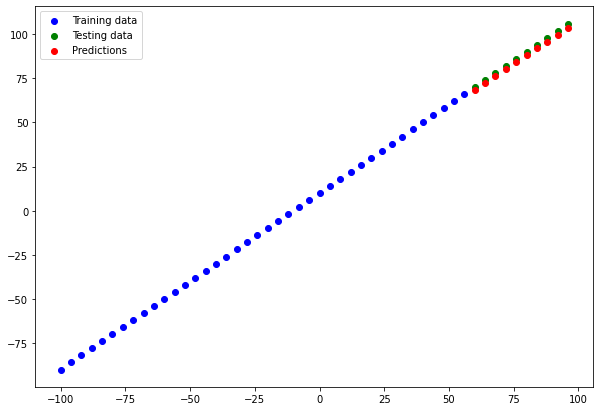

In [ ]:
plot_prediction(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
)

### Evaluating our model's prediction

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance

Since we're working on  a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's prediction
* MSE - mean square error, "sqaure the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 229ms/step - loss: 1.9676 - mae: 1.9676


[1.9676239490509033, 1.9676239490509033]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([19.537186, 16.106274, 13.437096, 11.529657, 10.383959, 10.      ,
       10.37778 , 11.517298, 13.418556, 16.081543], dtype=float32)>

In [ ]:
y_test = tf.cast(y_test, dtype=tf.float32)
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

In [ ]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.462814],
       [ 72.36716 ],
       [ 76.27151 ],
       [ 80.17586 ],
       [ 84.08021 ],
       [ 87.98456 ],
       [ 91.8889  ],
       [ 95.79324 ],
       [ 99.69759 ],
       [103.60193 ]], dtype=float32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.462814,  72.36716 ,  76.27151 ,  80.17586 ,  84.08021 ,
        87.98456 ,  91.8889  ,  95.79324 ,  99.69759 , 103.60193 ],
      dtype=float32)>

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9676231>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=3.9470246>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model



```
Build model --> fit it --> evaluate it --> tweak the model --> fit it --> evaluate it --> tweak it --> fit it --> evaluate it
```

#### The machine learning practitioner's motto
> "Experiment, experience, experiment"

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using more complex model) - this might come in the form og more layers or more hidden units in each layer
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modellinh experiments
1. `model_1` - same as the original model, 1 layer trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56], dtype=int32)>

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 44ms/step


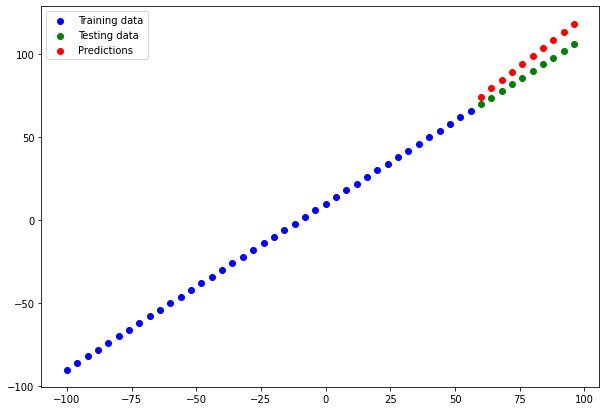

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.595519>,
 <tf.Tensor: shape=(), dtype=float32, numpy=80.37306>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse']
)

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 50ms/step


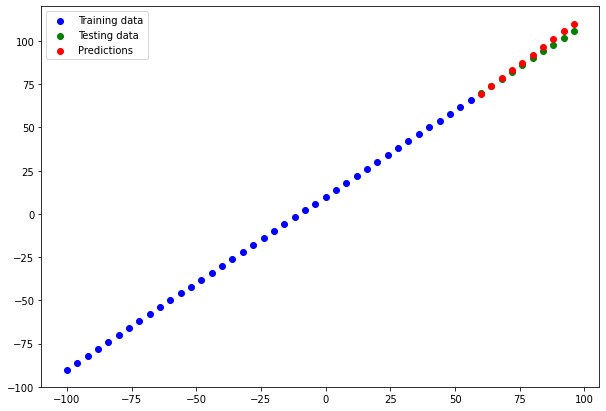

In [ ]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)

plot_prediction(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.8987099>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.395712>)

**Build `model_3`**

* 2 layers trained for 500 epochs

In [ ]:
# Set the random
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 50ms/step


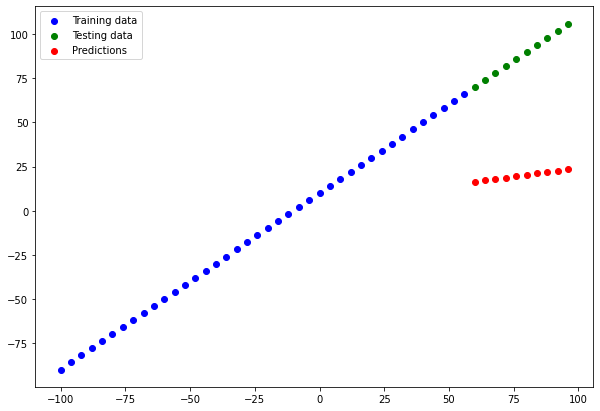

In [ ]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions=y_pred_3)

In [ ]:
# Calculate model_3 evaluation metrics

mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.09608>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4721.747>)

🔑 **Note** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary

## Comparing the results of out experiments
* We've run a few experiments, let's compare the results

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [
    ['model_1', mae_1.numpy(), mse_1.numpy()],
    ['model_2', mae_2.numpy(), mse_2.numpy()],
    ['model_3', mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,8.595519,80.373062
1,model_2,1.898710,5.395712
2,model_3,68.096077,4721.747070


Looks like model 2 performed the best

In [ ]:
model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                20        
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note** one of your main goals should be to minimize the time between your experiments. The more experiments you do the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment experiment experiment

## Tracking your experiments

One really good habit in machine learning modelling is to track the results if your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us

📖 **Resource:** As you build more models, you'll want to look into using:
* [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) - a component of the TensorFlow library to help track modeling experiments (We'll see this one later)
* [Weights & Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine experiments (plugs straight into TensorBoard.

## Saving our model

Saving our models allows us to use them outsize of Google Colabs (or wherever they were trained) such oas in a web application or a mobile app

There are two main format we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Load in saved models



In [ ]:
# Load in the SavedModel format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                20        
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_2 prediction with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_savedmodel_preds = loaded_SavedModel_format.predict(X_test)

model_2_preds == loaded_savedmodel_preds

1/1 [==============================] - 0s 69ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in model using the .h5 format
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                20        
                                                                 
 dense_47 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare loaded h5 predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_preds = loaded_h5_format.predict(X_test)

model_2_preds == loaded_h5_preds

1/1 [==============================] - 0s 59ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab
1. You can go to "files" tabs and right click on the file you're after and click download
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below)

In [ ]:
# Download a file form Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_and_deep_learning

cp: cannot create regular file '/content/drive/MyDrive/tensorflow_and_deep_learning': No such file or directory


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create x and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# view x
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1070, 268, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 8684.5635 - mae: 8684.5635
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7864.1953 - mae: 7864.1953
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7583.6807 - mae: 7583.6807
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7770.1763 - mae: 7770.1763
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7728.2202 - mae: 7728.2202
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.8062 - mae: 7605.8062
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 7582.8135 - mae: 7582.8135
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 7760.2710 - mae: 7760.2710
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7471.7573 - mae: 7471.7573
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7744.4033 - mae: 7744.4033

In [ ]:
# Check the result if the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7349.3901 - mae: 7349.3901


[7349.39013671875, 7349.39013671875]

In [ ]:
# try and predict the model
y_pred = insurance_model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... lets try and improve it

To (try) improve our model we'll run 2 experiments
1. Add an extra layer with more hidden units ans use the Adam optimizer
2. Same as above but Train for longer (200epochs)
3. 

In [ ]:
# Improving the model

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]);

# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# evaluate the model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4797.2651 - mae: 4797.2651


[4797.26513671875, 4797.26513671875]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model same as above
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3500.4343 - mae: 3500.4343


[3500.434326171875, 3500.434326171875]

Text(0.5, 0, 'epochs')

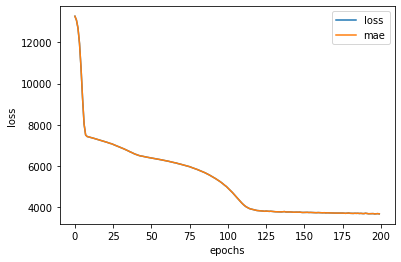

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However many people have asked this question before... so TensorFlow has a solution. It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) which is a TensorFlow component you can add to your model to stop training once it stops improving a certain mertic

## Preprocessing data (normalization and standardization)

**Normalization** is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information

## Feature scaling
|Scaling type |What it does |Scikit-Learn Function| When to use|
|---|---|---|---|
|Scale (also referref to as normalization| Converts all values to between 0 and 1 whilst preserving the original distribution.| MinMaxScaler| Use as default scaler with neural networks|
|Standardization| Removes the mean and divides each value by the standard deviation| StandardScaler| Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers)|  


In terms of scaling values, neural networks tend to prefer normalization.
If you're not sure on which to use you could try both and see which performs better

In [ ]:
# Read in the insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To Prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# what does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes

In [ ]:
# Build a neural network model to fit on our normalized data

# set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3439.5515 - mae: 3439.5515


[3439.551513671875, 3439.551513671875]